In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../nadavp/PythonScripts/')
import BeadDataFile
from discharge_tools import *

## Functions

In [5]:
fname = r'/data/new_trap/20190607/ZPositionSetup_74.h5'
BDF = BeadDataFile.BeadDataFile(fname)

In [6]:
foldername = r'/data/new_trap/20190607/'
BDFs = load_dir(foldername, file_prefix='ZPos')

105  files in folder
105  files loaded


In [7]:
BDF.response_at_freq('y',drive_freq=127)

array([-3.34175274e+04, -3.28174956e+04, -3.13833276e+04, ...,
       -3.85658414e-02, -3.84663455e-02, -3.69761961e-02])

<IPython.core.display.Javascript object>


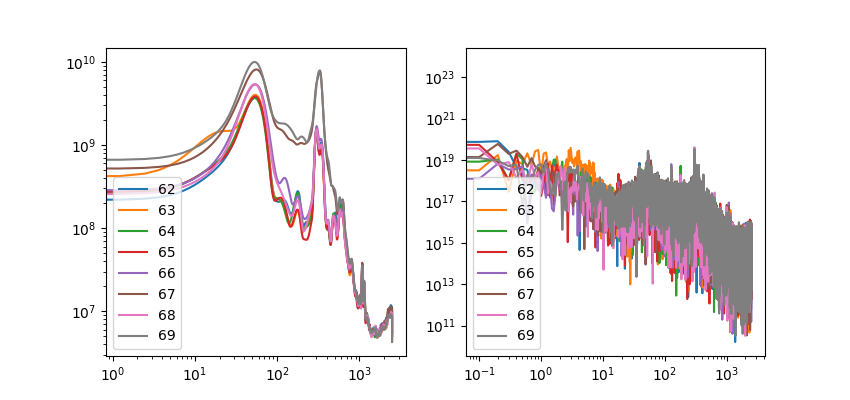

In [13]:
_,ax = plt.subplots(1,2,figsize=(8.5,4))
[ax[0].loglog(*BDFs[i].welch_psd('y'),label=str(i)) for i in range(62,70)]
ax[0].legend()
[ax[1].loglog(*BDFs[i].psd('y'),label=str(i)) for i in range(62,70)]
ax[1].legend()

In [8]:
responses = [B.response_at_freq('y',drive_freq=127) for B in BDFs]

In [27]:
5000/100

50.0

<IPython.core.display.Javascript object>


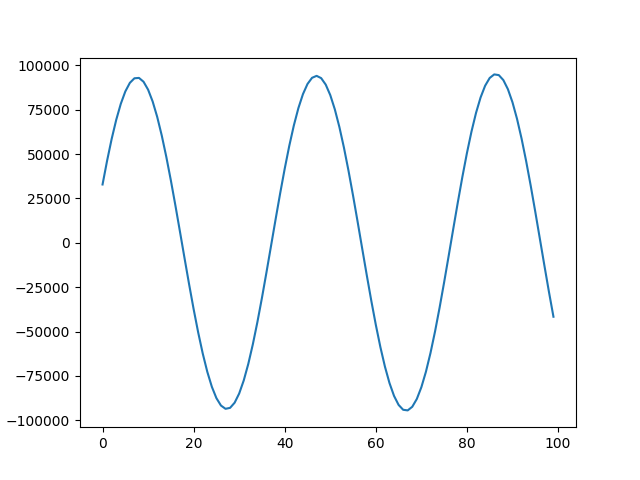

In [45]:
_,ax = plt.subplots()
ax.plot(range(100),responses[104][1000:1100])

<IPython.core.display.Javascript object>


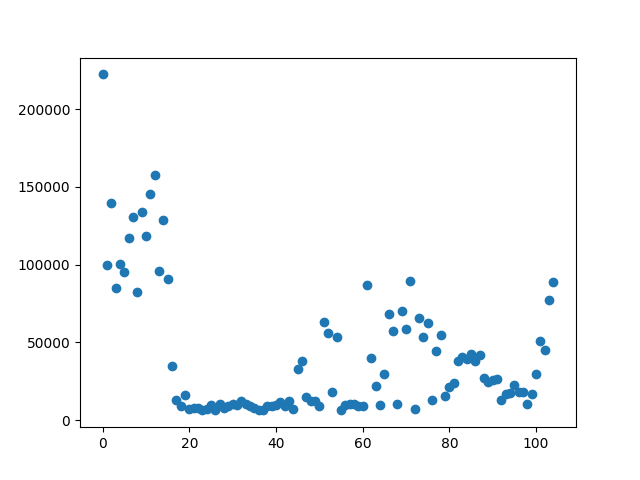

In [13]:
_,ax = plt.subplots()
rr = [np.std(resp_) for resp_ in responses]
ax.scatter(range(len(rr)),rr)

In [79]:
fname = r'/home/data_transfer/data_from_windows/Testdata/DischargeTest/Discharge_0'

In [80]:
f = h5py.File(fname,'r')
pos_data = np.array(f['pos_data']).reshape(-1,11).T
quad_data = np.array(f['quad_data']).reshape(-1,12).T
fsamp = f.attrs['Fsamp']
fsamp /= f.attrs['downsamp']
#f.attrs['driven_electrode']

In [81]:
list(f.attrs)

['Fsamp', 'downsamp', 'electrode_amp', 'electrode_channel', 'electrode_freq']

In [82]:
f.attrs['electrode_freq']

100.0

<IPython.core.display.Javascript object>


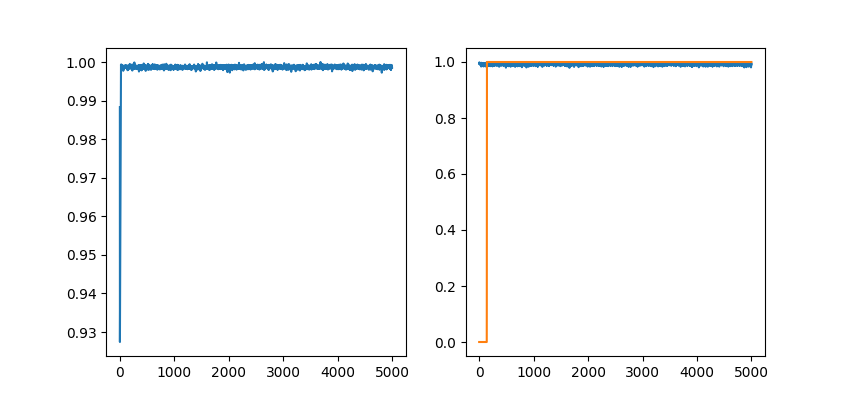

In [55]:
_,ax = plt.subplots(1,2,figsize=(8.5,4))
_ = [ax[0].plot(range(5000), qq/np.max(qq)) for qq in [quad_data[0]]]
_ = [ax[1].plot(range(5000), qq/np.max(qq)) for qq in [pos_data[1],pos_data[5]]]